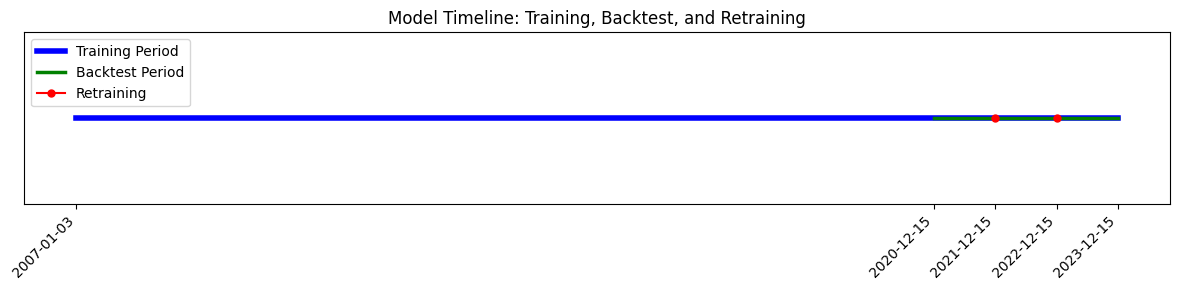

In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

startdate = datetime(2007, 1, 3)
backtest_start_date = datetime(2020, 12, 15)
enddate = datetime(2023, 12, 15)
retrain_dates_corrected = [datetime(2021, 12, 15), datetime(2022, 12, 15)]



fig, ax = plt.subplots(figsize=(12, 3))
timeline_height = 1

# Main timeline for reference, subtle
ax.plot([startdate, enddate], [timeline_height, timeline_height], 'grey', linewidth=1, alpha=0.5)

# Training period, using a vibrant color
ax.plot([startdate, enddate], [timeline_height, timeline_height], 'blue', label="Training Period", linewidth=4)

# Backtest period starting marker, highlighted distinctly
ax.plot([backtest_start_date, enddate], [timeline_height, timeline_height], 'green', label="Backtest Period", linewidth=2.5)

# Retraining markers, making them stand out
for date in retrain_dates_corrected:
    ax.plot(date, timeline_height, 'red', marker='o', markersize=5, label="Retraining" if date == retrain_dates_corrected[0] else "")

# Adjusting x-axis
ax.set_yticks([])
ax.set_xticks([startdate, backtest_start_date] + retrain_dates_corrected + [enddate])
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in [startdate, backtest_start_date] + retrain_dates_corrected + [enddate]], rotation=45, ha="right")

# Legend optimization
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.title("Model Timeline: Training, Backtest, and Retraining")
plt.tight_layout()
plt.show()

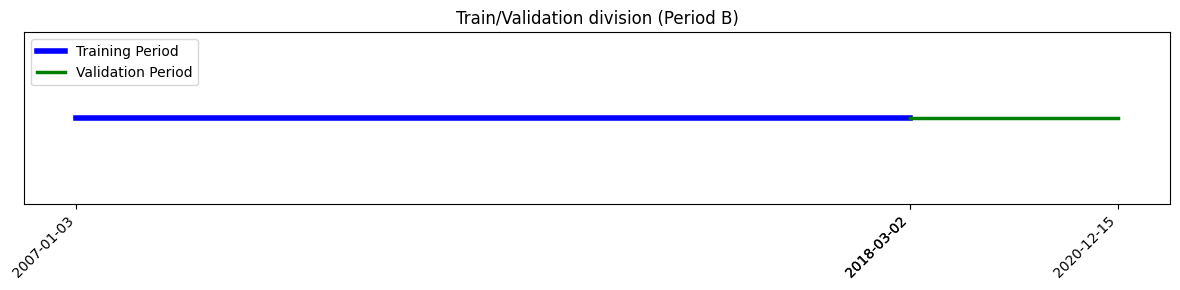

In [13]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Updated period
startdate = datetime(2007, 1, 3)
enddate = datetime(2020, 12, 15)

# Calculate total period length
total_period = enddate - startdate

# Calculate training and validation periods (80% for training, 20% for validation)
training_period_end = (startdate + timedelta(days=0.8 * total_period.days)).date()
validation_start_date =training_period_end

fig, ax = plt.subplots(figsize=(12, 3))
timeline_height = 1

# Main timeline for reference, subtle
ax.plot([startdate, enddate], [timeline_height, timeline_height], 'grey', linewidth=1, alpha=0.5)

# Training period, using a vibrant color
ax.plot([startdate, training_period_end], [timeline_height, timeline_height], 'blue', label="Training Period", linewidth=4)

# Validation period, highlighted distinctly
ax.plot([validation_start_date, enddate], [timeline_height, timeline_height], 'green', label="Validation Period", linewidth=2.5)

# Adjusting x-axis
ax.set_yticks([])
ax.set_xticks([startdate, training_period_end, validation_start_date, enddate])
ax.set_xticklabels([d.strftime('%Y-%m-%d') for d in [startdate, training_period_end, validation_start_date, enddate]], rotation=45, ha="right")

# Legend optimization
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.title("Train/Validation division (Period B)")
plt.tight_layout()
plt.show()


In [6]:
training_period_end.date()

datetime.date(2015, 10, 7)